In [1]:
"""Implement a KNN model to classify the animals in to category"""
 

'Implement a KNN model to classify the animals in to category'

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [11]:
df = pd.read_csv("Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [12]:
df.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [13]:
pd.options.mode.chained_assignment = None  # default='warn'
#Label_Encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df.iloc[:,0] = LE.fit_transform(df.iloc[:,0])




C:\Users\Acer\AppData\Local\Temp\ipykernel_7992\1297701270.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,0] = LE.fit_transform(df.iloc[:,0])


In [14]:

#std Scaler
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
df.iloc[:,1:] = ss.fit_transform(df.iloc[:,1:])


In [15]:
#Partition

df = pd.DataFrame(df)
Y = df[["type"]]
X = df.iloc[:,:17]

# convert column type to integer data type
Y = df['type'].astype(int)
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
96     0
97     1
98     0
99     1
100    0
Name: type, Length: 101, dtype: int32


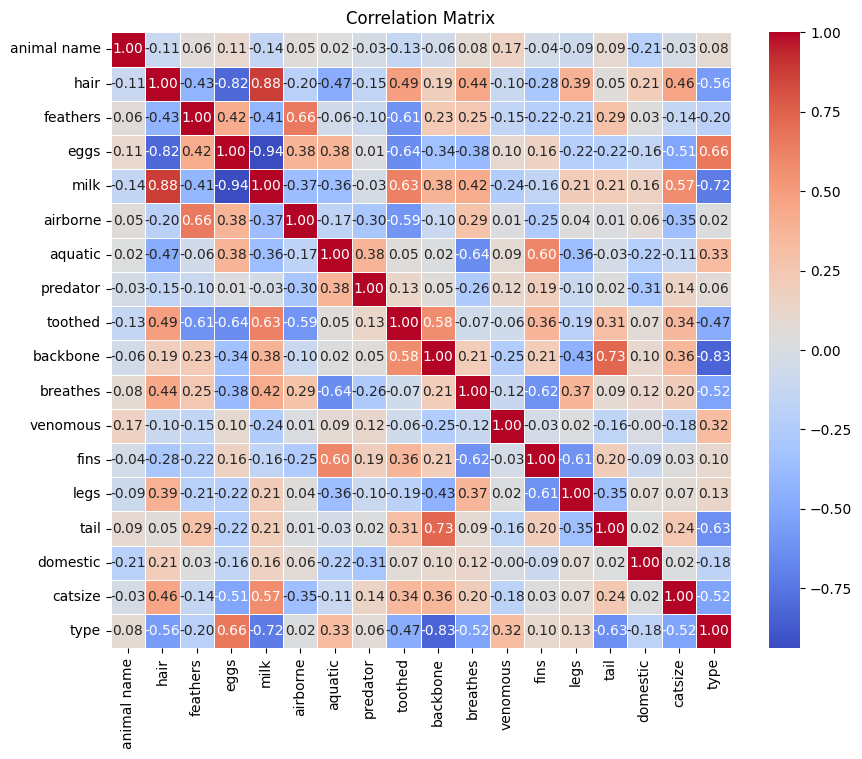

In [16]:
import seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

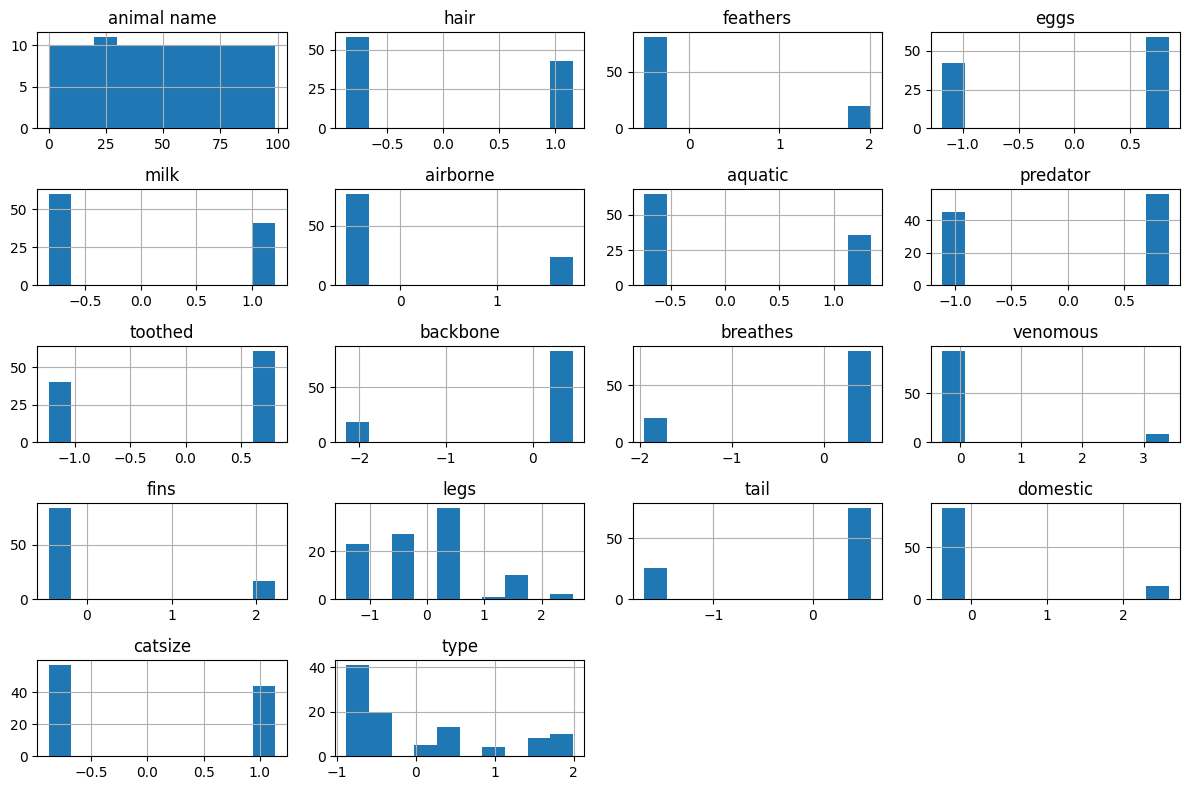

In [20]:
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

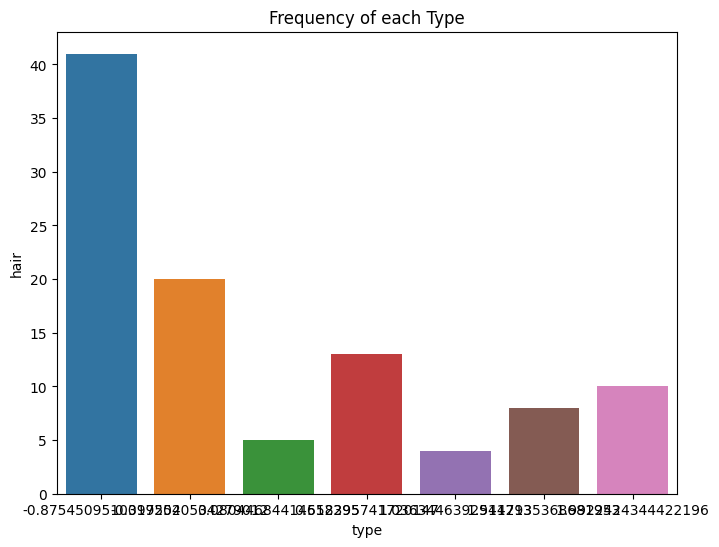

In [23]:
# Bar plot of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data= df)
plt.xlabel('type')
plt.ylabel('hair')
plt.title('Frequency of each Type')
plt.show()

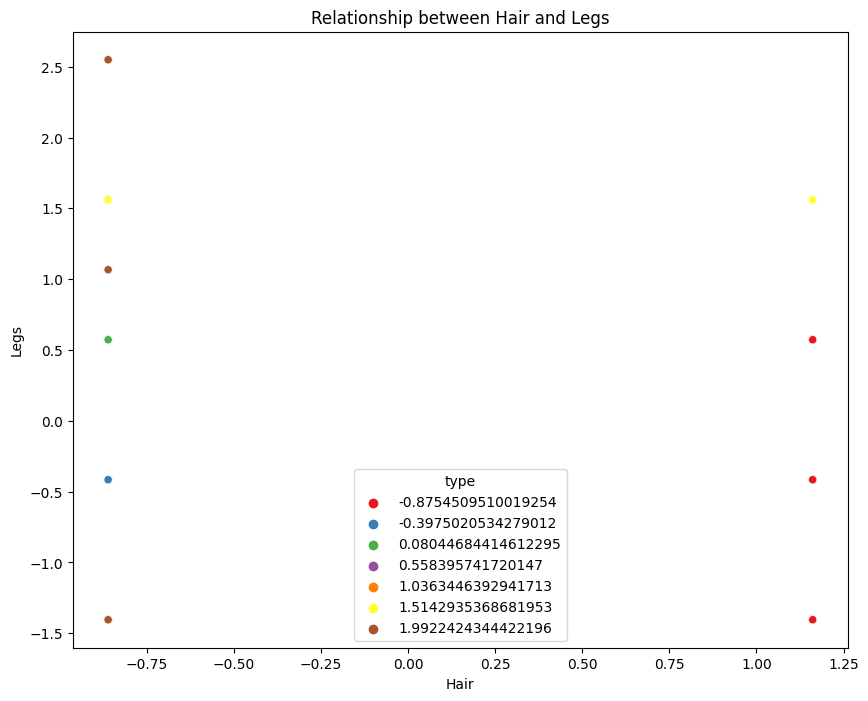

In [25]:
# Scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='hair', y='legs', data=df, hue='type', palette='Set1')
plt.xlabel('Hair')
plt.ylabel('Legs')
plt.title('Relationship between Hair and Legs')
plt.show()

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3,stratify = Y, random_state = 20)#any no

In [9]:
#model fitting 

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2, p= 2)#k=8 p=2-Eucleadian dist, p=1 - Manhatten dist
knn.fit(X_train, Y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)


In [11]:
from sklearn.metrics import  accuracy_score
print("Training accuracy Score = ", accuracy_score(Y_train,y_pred_train))

print("Test accuracy Score = ", accuracy_score(Y_test,y_pred_test))

Training accuracy Score =  0.9285714285714286
Test accuracy Score =  0.8387096774193549
